### Data Cleaning of Loan Prediction

In [3]:
import pandas as pd # I used it to call the dataset
df = pd.read_csv('Loan Prediction data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
duplicated_count = df.duplicated().sum()
duplicated_count  

0

### * Data Source
##### Loan Prediction Data from Africa Agility Trainer (Mr Cyril)

### * Number of Records is 614

### * Missing Values
##### Gender has 13 missing
##### Married has 3 missing
##### Dependents have 15 missing
##### Self_Employed has 32 missing
##### LoanAmount has 22 missing
##### Loan_Amount_Term has 14 missing
##### Credit_History has 50 missing


### * Data Attributes
##### 1. Loan_ID – Unique identifier for the loan application.
##### 2. Gender – Applicant's gender (Male/Female).
##### 3. Married – Marital status of the applicant.
##### 4. Dependents – Number of dependents.
##### 5. Education – Education level (Graduate/Not Graduate).
##### 6. Self_Employed – Whether the applicant is self-employed.
##### 7. ApplicantIncome – Income of the applicant.
##### 8. CoapplicantIncome – Income of the co-applicant (if any).
##### 9. LoanAmount – Loan amount requested.
##### 10. Loan_Amount_Term – Loan repayment term (in months).
##### 11. Credit_History – Credit history of the applicant.
##### 12. Property_Area – The type of area where the property is located (Urban/Semiurban/Rural).
##### 13. Loan_Status – Whether the loan was approved or not (Y/N).

### * Initial Observation
##### Numerical Features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History
##### Categorical Features: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
##### There are no duplicate rows in the dataset
##### Loan_Amount_Term should be integer not float, Credit_History should be categorical not numerical, while Dependents should be numerical 
 

#### Perform EDA to understand the datasets well before cleaning

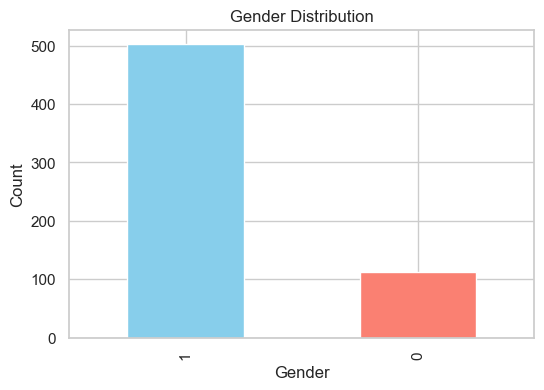

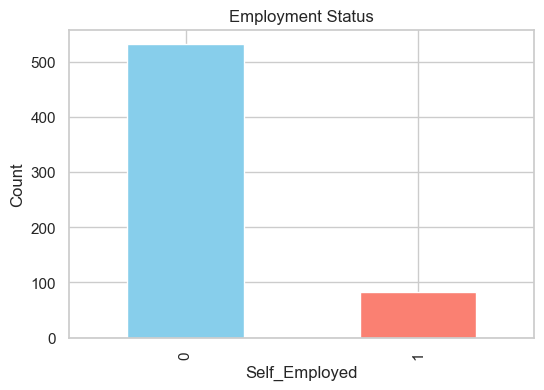

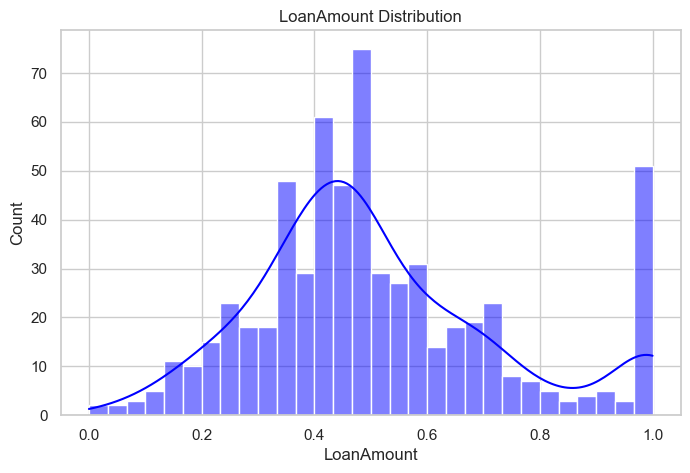

Text(0, 0.5, 'Credit_History')

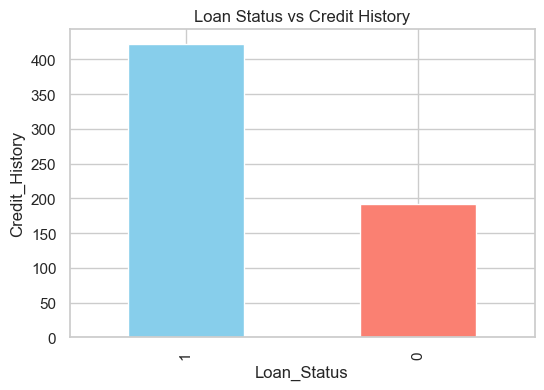

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set_style("whitegrid")
import warnings  
warnings.filterwarnings('ignore') 

# Gender distribution using bar chart 
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Distribution of employment status using bar chart
plt.figure(figsize=(6, 4))
df['Self_Employed'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Employment Status')
plt.xlabel('Self_Employed')
plt.ylabel('Count')

 
# Distribution of Applicant income using histogram        # to know if the data follows a normal distribution or not
plt.figure(figsize=(8, 5))
sns.histplot(df["LoanAmount"].dropna(), bins=30, kde=True, color="blue")  
# Customize the plot
plt.title("LoanAmount Distribution")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()


# Compare Credit history versus Loan status using a bar chart to show number of times Loan was approved or not
plt.figure(figsize=(6, 4))
df['Loan_Status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Loan Status vs Credit History')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')






#### Clean the datasets. To clean the datasets, i made a copy using...

In [5]:
df = df.copy()

In [7]:
# Fill categorical missing values with mode (most frequent value)
categorical_cols = ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History", "Loan_Amount_Term"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical missing values with median
numerical_cols = ["LoanAmount"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that missing values are handled
missing_values_after = df.isnull().sum()
missing_values_after


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### I'll now perform EDA on the cleaned datasets. I'll analyse:
###### * The employment Status of the Applicant
###### * Check the Gender Distribution
###### * The Applicant Income Distribution
###### * Compare Credit history versus Loan status of the Applicant

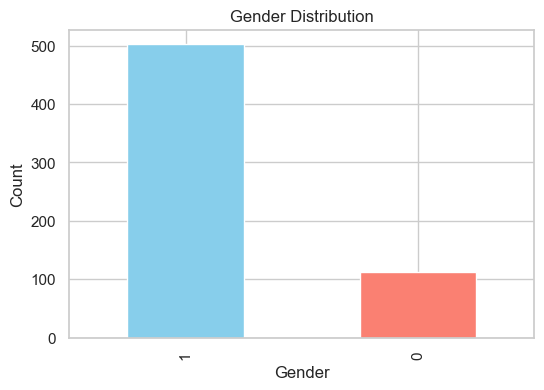

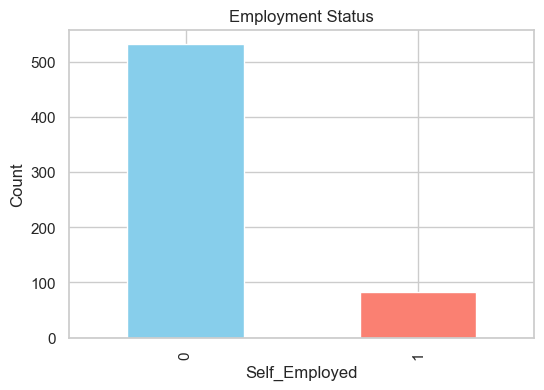

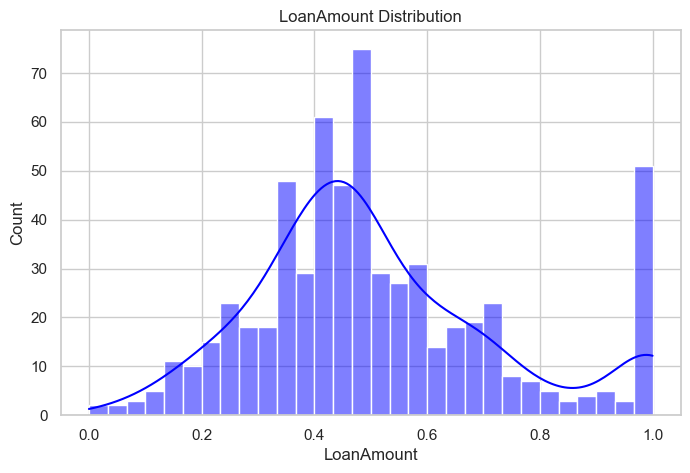

Text(0, 0.5, 'Credit_History')

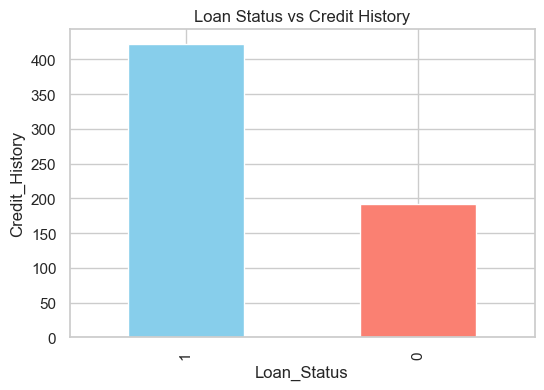

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set_style("whitegrid")
import warnings  
warnings.filterwarnings('ignore') 

# Gender distribution after cleaning
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Distribution of employment status after cleaning
plt.figure(figsize=(6, 4))
df['Self_Employed'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Employment Status')
plt.xlabel('Self_Employed')
plt.ylabel('Count')

 
plt.figure(figsize=(8, 5))
sns.histplot(df["LoanAmount"].dropna(), bins=30, kde=True, color="blue")  
# Customize the plot
plt.title("LoanAmount Distribution")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()


# Compare Credit history versus Loan status using a bar chart to show number of times Loan was approved or not
plt.figure(figsize=(6, 4))
df['Loan_Status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# Customize the plot
plt.title('Loan Status vs Credit History')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')



### I will now perform Feature Transformation using two methods:
##### * Normalization for numerical variables
##### * Encoding for Categorical Variables

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Apply Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Display scaled data
df.head()

KeyError: "['LoanAmount'] not in index"

##### Numerical features (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History) are now scaled between 0 and 1 using Min-Max Scaling. I did this by subtracting the minimum value of the feature and dividing by the range (maximum value - minimum value)

In [37]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply Label Encoding
encoder = LabelEncoder()
for col in cat_features:
    df[col] = encoder.fit_transform(df[col])

# Display transformed data
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


##### Categorical variables (Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status) are now converted into numerical values using label encoding. i.e (yes → 1, no → 0)

### I will check for Outliers and treat any outliers found using IQR (Interquartile range).

In [47]:
from scipy import stats
import numpy as np

# Selecting a numerical column for outlier detection
z_scores = stats.zscore(df[num_features].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_no_outliers = df[filtered_entries]

print(f"Original data points: {len(df)}; After outlier removal: {len(df_no_outliers)}")

Original data points: 614; After outlier removal: 614


In [77]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features (Outlier Detection)")
plt.show()

KeyError: "['LoanAmount'] not in index"

<Figure size 1200x600 with 0 Axes>

##### Outlier Detection Insights:
##### * The boxplot shows outliers in ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.
##### * I'll handle outliers using the Interquartile Range (IQR) method to cap extreme values.

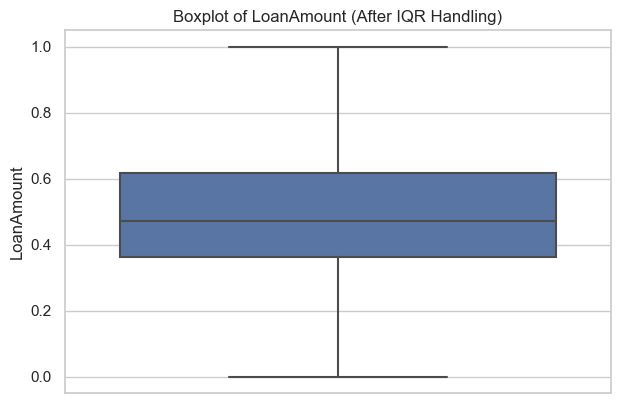

In [51]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply IQR method to handle outliers
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    df = remove_outliers_iqr(df, col)

# Recheck outliers using boxplots after handling
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} (After IQR Handling)")
plt.tight_layout()
plt.show()


### Part 1(4) Performing EDA

In [53]:
df.describe() # this provides summary statistics of the dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.445764,0.247200,0.508379,0.706005,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.247459,0.282878,0.220910,0.137668,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.272172,0.000000,0.361386,0.743590,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.365473,0.206943,0.471287,0.743590,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.563303,0.400000,0.616832,0.743590,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


#### I will visualize data distributions and relationships using bar charts, histograms, and Boxplot  for the following features below:
##### *Use Histogram to check  ApplicantIncome (distribution of applicant income)
##### *Use Histogram to check  LoanAmount (amount requested for loans)
##### *Use Bar chart to check Gender 
##### * Use Histogram to check ApplicantIncome and CoapplicantIncome (Are incomes normally distributed?)
##### * Use Box plot to check LoanAmount vs. Loan_Amount_Term (Do higher loan amounts have longer terms?)
##### * Use Bar chart to check LoanStatus vs. Gender (Are males more likely to get approved?))

In [73]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import numpy as np

# Feature Engineering: Create TotalIncome and apply log transformation
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Log_TotalIncome'] = df['TotalIncome'].apply(lambda x: np.log1p(x))

# Apply log transformation to LoanAmount to reduce skewness
df['Log_LoanAmount'] = df['LoanAmount'].apply(lambda x: np.log1p(x))

# Feature Scaling using StandardScaler
scaler = StandardScaler()
df[['Log_TotalIncome', 'Log_LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(df[['Log_TotalIncome', 'Log_LoanAmount', 'Loan_Amount_Term']])

# Drop original TotalIncome and LoanAmount columns as they are now transformed
df.drop(columns=['TotalIncome', 'LoanAmount'], inplace=True)

# Display updated dataset info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Log_TotalIncome    614 non-null    float64
 13  Log_LoanAmount     614 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 67.3+ KB


(None,
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 0  LP001002       1        0           0          0              0   
 1  LP001003       1        1           1          0              0   
 2  LP001005       1        1           0          0              1   
 3  LP001006       1        1           0          1              0   
 4  LP001008       1        0           0          0              0   
 
    ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
 0         0.568692           0.000000          0.273231             1.0   
 1         0.442360           0.262575          0.273231             1.0   
 2         0.284396           0.000000          0.273231             1.0   
 3         0.242784           0.410578          0.273231             1.0   
 4         0.583760           0.000000          0.273231             1.0   
 
    Property_Area  Loan_Status  Log_TotalIncome  Log_LoanAmount  
 0              2            1        -0.